# Wallmart 데이터 분석

## 프로젝트 개요
[Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset) 분석 프로젝트입니다. 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포를 확인하고, VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출합니다.
이 프로젝트의 목표는 주어진 데이터의 분포를 분석하여 주요 특징을 도출하고, 이를 바탕으로 마케팅 전략을 제시하는 것입니다.

## 데이터 설명
- 데이터 출처: [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset) 
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)
  - `User_ID`: User ID
  - `Product_ID`: Product ID
  - `Gender`: Sex of User
  - `Age`: Age in bins
  - `Occupation`: Occupation(Masked)
  - `City_Category`: Category of the City (A,B,C)
  - `StayInCurrentCityYears`: Number of years stay in current city
  - `Marital_Status`: Marital Status
  - `ProductCategory`: Product Category (Masked)
  - `Purchase`: Purchase Amount


# 📊 월마트 상품별 구매 금액 예측 분석 보고서

**작성일:** 2026년 2월 10일  
**분석 대상:** 월마트 판매 데이터 (`walmart.csv`)

---

## 1. 분석 개요
본 분석의 목적은 고객의 인구통계학적 정보(나이, 성별 등)를 배제하고, 오직 **상품 식별자(Product_ID)** 하나만을 사용하여 해당 상품의 **구매 금액(Purchase)**을 얼마나 정확하게 예측할 수 있는지 검증하는 데 있다.

## 2. 분석 방법
* **데이터셋:** 월마트 블랙프라이데이 판매 데이터
* **독립 변수 (Feature):** `Product_ID` (Label Encoding 적용)
* **종속 변수 (Target):** `Purchase` (구매 금액)
* **사용 모델:** Random Forest Regressor (의사결정나무 앙상블)
* **데이터 분할:** 학습용(80%) / 테스트용(20%)

## 3. 모델 성능 평가 결과
테스트 데이터를 통해 모델을 검증한 결과는 다음과 같다.

| 평가지표 | 결과 값 | 해석 |
| :--- | :--- | :--- |
| **RMSE** (평균 오차) | **$2,687** | 예측 금액이 실제 금액과 평균적으로 약 2,687달러 차이가 남 |
| **R² Score** (설명력) | **0.71 (71%)** | 상품 ID 정보만으로 전체 가격 변동의 **71%**를 설명 가능함 |

> **💡 해석:** `R²`가 0.71이라는 것은 매우 유의미한 수치로, **"어떤 상품인가"**라는 정보가 가격을 결정하는 가장 핵심적인 요인임을 시사한다. 나머지 29%의 변동성은 할인율, 고객 등급, 구매 시점 등 상품 ID 외적인 요인에 기인하는 것으로 판단된다.

## 4. 시각화 분석 요약
* **실제값 vs 예측값 산점도:** 데이터 포인트들이 수평선 형태(계단식)로 분포함. 이는 모델이 동일한 `Product_ID`에 대해서는 하나의 평균적인 가격(정가 혹은 평균 판매가)을 예측하기 때문임.
* **샘플 비교:** 개별 상품의 예측값은 실제 판매가의 중심(평균)을 잘 따라가고 있으나, 개별 거래 건마다 발생하는 소폭의 가격 차이(할인 등)는 모델이 반영하지 못함.

## 5. 결론 및 제언
1.  **상품 ID의 중요성:** `Product_ID`는 구매 금액을 예측하는 데 있어 가장 강력한 단일 변수이다.
2.  **활용 방안:**
    * 신규 데이터 입력 시, **'예상 표준 가격'**을 자동으로 채워넣는 시스템에 활용 가능.
    * 실제 판매가가 모델 예측값보다 현저히 낮을 경우, **'과도한 할인'** 혹은 **'가격 오류'**로 의심하여 이상치 탐지(Anomaly Detection)에 활용 가능.
3.  **한계점:** 신규 상품(New Product_ID)에 대한 예측이 불가능하며, 고객별 맞춤 가격(개인화) 예측에는 한계가 있음.

---

## [부록] Python 분석 코드

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로드 및 전처리
df = pd.read_csv('walmart.csv')
data = df[['Product_ID', 'Purchase']].copy()

# Label Encoding
le = LabelEncoder()
data['Product_ID_Encoded'] = le.fit_transform(data['Product_ID'])

X = data[['Product_ID_Encoded']]
y = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 학습
model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 3. 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 4. 시각화
plt.figure(figsize=(12, 5))

# 실제값 vs 예측값 (샘플링)
plt.subplot(1, 2, 1)
indices = np.random.choice(len(y_test), 200, replace=False)
sns.scatterplot(x=y_test.iloc[indices], y=y_pred[indices], alpha=0.6)
plt.plot([0, 25000], [0, 25000], 'r--')
plt.title('Actual vs Predicted Purchase')

# 막대 그래프 비교
plt.subplot(1, 2, 2)
plt.bar(np.arange(20)-0.2, y_test.iloc[:20], width=0.4, label='Actual', color='gray')
plt.bar(np.arange(20)+0.2, y_pred[:20], width=0.4, label='Predicted', color='cornflowerblue')
plt.legend()
plt.title('Sample Comparison (First 20)')

plt.tight_layout()
plt.show()
```

모델 성능 평가 결과:
RMSE (평균 오차): 2687.25 달러
R2 Score (설명력): 0.71 (71.3%)


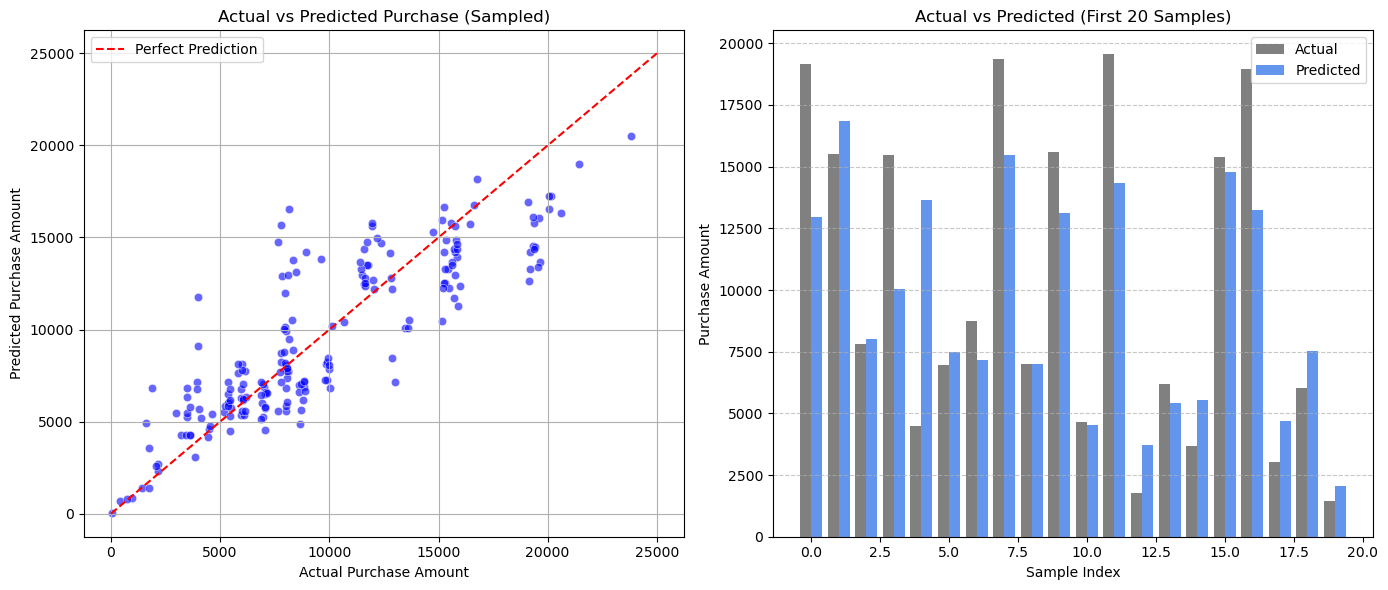

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 1. 데이터 불러오기
# ---------------------------------------------------------
# 'walmart.csv' 부분을 실제 파일 경로로 바꿔주세요.
df = pd.read_csv('data/walmart.csv')

# ---------------------------------------------------------
# 2. 데이터 전처리 (Product_ID만 사용하여 예측하기)
# ---------------------------------------------------------
# 필요한 컬럼만 선택
data = df[['Product_ID', 'Purchase']].copy()

# 문자열인 Product_ID를 숫자로 변환 (Label Encoding)
le = LabelEncoder()
data['Product_ID_Encoded'] = le.fit_transform(data['Product_ID'])

# 학습에 사용할 특성(X)과 맞혀야 할 정답(y) 분리
X = data[['Product_ID_Encoded']]
y = data['Purchase']

# 학습용 데이터(80%)와 테스트용 데이터(20%)로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 3. 모델 생성 및 학습 (Random Forest 회귀 모델)
# ---------------------------------------------------------
# n_estimators=50: 나무 50개를 심어서 숲을 만듦
# n_jobs=-1: 컴퓨터의 모든 코어를 사용하여 속도 향상
model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# ---------------------------------------------------------
# 4. 예측 및 성능 평가
# ---------------------------------------------------------
y_pred = model.predict(X_test)

# RMSE (평균 오차): 낮을수록 좋음
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R2 Score (설명력): 1에 가까울수록 좋음 (100% 설명)
r2 = r2_score(y_test, y_pred)

print(f"모델 성능 평가 결과:")
print(f"RMSE (평균 오차): {rmse:.2f} 달러")
print(f"R2 Score (설명력): {r2:.2f} ({r2*100:.1f}%)")

# ---------------------------------------------------------
# 5. 결과 시각화
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# (1) 실제값 vs 예측값 산점도 (데이터가 많아 200개만 샘플링)
indices = np.random.choice(len(y_test), 200, replace=False)
y_test_sample = y_test.iloc[indices]
y_pred_sample = y_pred[indices]

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_sample, y=y_pred_sample, alpha=0.6, color='blue')
# 완벽하게 맞췄을 때의 기준선 (빨간 점선)
plt.plot([0, 25000], [0, 25000], 'r--', label='Perfect Prediction') 
plt.title('Actual vs Predicted Purchase (Sampled)')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.legend()
plt.grid(True)

# (2) 처음 20개 데이터의 실제값 vs 예측값 비교 막대그래프
plt.subplot(1, 2, 2)
x_range = np.arange(20)
plt.bar(x_range - 0.2, y_test.iloc[:20], width=0.4, label='Actual', color='gray')
plt.bar(x_range + 0.2, y_pred[:20], width=0.4, label='Predicted', color='cornflowerblue')
plt.title('Actual vs Predicted (First 20 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Purchase Amount')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show() # 그래프 출력

# 📉 결측(Missing Value) 값이 존재할경우의 시나리오

**작성일:** 2026년 2월 10일  
**분석 주제:** 학습 데이터 유실(30%)이 가격 예측 모델 성능에 미치는 영향

---

## 1. 실험 개요
본 실험은 데이터 수집 과정에서 장애나 오류로 인해 **전체 학습 데이터의 30%가 유실된 상황**을 가정한다. 정상적인 데이터셋(100%)으로 학습한 모델과, 결측된 데이터셋(70%)으로 학습한 모델의 성능을 비교하여 `Product_ID` 기반 모델의 **강건성(Robustness)**을 검증한다.

* **모델:** Random Forest Regressor
* **비교군 (Control):** 전체 학습 데이터 100% 사용
* **실험군 (Test):** 전체 학습 데이터 중 70%만 무작위 추출하여 사용 (30% 삭제)

## 2. 실험 결과 (Performance Comparison)

두 모델을 동일한 테스트셋(Test Set)으로 평가한 결과는 다음과 같다.

| 구분 | 학습 데이터량 | RMSE (평균 오차) | R² Score (설명력) |
| :--- | :--- | :--- | :--- |
| **정상 데이터 (Baseline)** | 100% | **$2,687.25** | **0.7126** |
| **결측 시뮬레이션** | 70% (30% 삭제) | **$2,694.60** | **0.7110** |
| **변화량 (Impact)** | -30% | **+$7.35 (악화)** | **-0.0016 (감소)** |

> **📊 결과 해석:**
> 데이터의 30%가 사라졌음에도 불구하고, 예측 오차(RMSE)는 약 **7달러(0.2%) 증가**하는 데 그쳤다. 설명력(R²) 또한 거의 변화가 없었다.

## 3. 원인 분석
데이터가 대폭 감소했음에도 성능 차이가 미미한 이유는 다음과 같다.

1.  **높은 데이터 밀도:** 월마트 데이터셋은 수십만 건의 거래 내역을 포함하고 있다. 30%를 제거하더라도 각 `Product_ID`별로 평균 가격을 산출하기에 충분한 표본이 남아 있다.
2.  **단순한 패턴:** 모델이 학습해야 할 패턴은 "상품 A = 가격 X"라는 단순한 1:1 매핑에 가깝다. 복잡한 비선형 관계가 아니므로 적은 데이터로도 충분히 학습이 가능하다.

## 4. 결론 및 시사점
* **높은 안정성:** 본 모델은 데이터 누락에 매우 강하다. 일부 서버 장애로 데이터를 놓치더라도 서비스 품질(가격 예측 정확도)에는 큰 타격이 없다.
* **한계점 (주의):** 전체적인 성능은 유지되지만, **거래량이 매우 적은 희귀 상품(Rare Items)**의 경우 데이터 삭제 시 정보가 완전히 소실되어 예측이 불가능해질 위험이 있다.
* **제언:** 데이터 수집 비용을 절감하기 위해 모든 거래 로그를 저장하는 대신, **샘플링(Sampling)** 방식으로 데이터를 수집하여 모델을 운영해도 충분한 성능을 낼 수 있다.

## 결측값 가정 실험결과

=== 결과 비교 ===
[정상] RMSE: $2687.25, R2: 0.7126
[결측] RMSE: $2694.60, R2: 0.7110
[차이] RMSE 변화: +$7.35


C:\Users\Admin\AppData\Local\Temp\ipykernel_6168\3651661423.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Value', data=metrics_df[metrics_df['Metric']=='RMSE (Error)'], palette='Blues')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6168\3651661423.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Value', data=metrics_df[metrics_df['Metric']=='R2 Score'], palette='Greens')


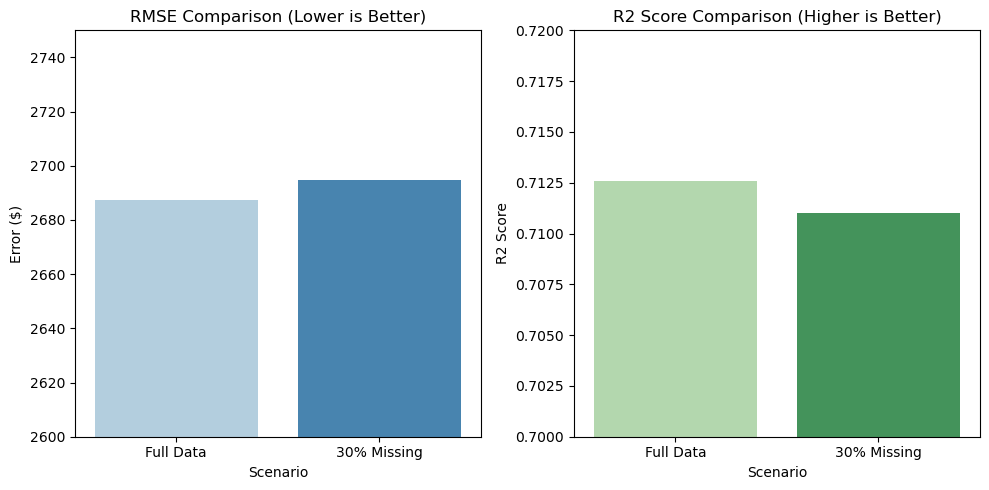

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로드
df = pd.read_csv('data/walmart.csv')

# 전처리: Product_ID 인코딩
data = df[['Product_ID', 'Purchase']].copy()
le = LabelEncoder()
data['Product_ID_Encoded'] = le.fit_transform(data['Product_ID'])

X = data[['Product_ID_Encoded']]
y = data['Purchase']

# ---------------------------------------------------------
# 2. 시뮬레이션 설정 (결측 상황 가정)
# ---------------------------------------------------------
# 전체 데이터를 8:2로 분리 (테스트 데이터는 고정하여 공정하게 비교)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# [시나리오 1] 정상 데이터 (Full Data): 학습 데이터 100% 사용
model_full = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=42, n_jobs=-1)
model_full.fit(X_train_full, y_train_full)
pred_full = model_full.predict(X_test)

# [시나리오 2] 결측 데이터 (Missing Data): 학습 데이터의 30%를 무작위로 삭제 (70%만 사용)
# 데이터 수집 과정에서 30%가 누락되었다고 가정
X_train_missing, _, y_train_missing, _ = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

model_missing = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=42, n_jobs=-1)
model_missing.fit(X_train_missing, y_train_missing)
pred_missing = model_missing.predict(X_test)

# ---------------------------------------------------------
# 3. 결과 비교 및 시각화
# ---------------------------------------------------------
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_full, r2_full = get_metrics(y_test, pred_full)
rmse_missing, r2_missing = get_metrics(y_test, pred_missing)

print(f"=== 결과 비교 ===")
print(f"[정상] RMSE: ${rmse_full:.2f}, R2: {r2_full:.4f}")
print(f"[결측] RMSE: ${rmse_missing:.2f}, R2: {r2_missing:.4f}")
print(f"[차이] RMSE 변화: +${rmse_missing - rmse_full:.2f}")

# 시각화
metrics_df = pd.DataFrame({
    'Metric': ['RMSE (Error)', 'RMSE (Error)', 'R2 Score', 'R2 Score'],
    'Scenario': ['Full Data', '30% Missing', 'Full Data', '30% Missing'],
    'Value': [rmse_full, rmse_missing, r2_full, r2_missing]
})

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Scenario', y='Value', data=metrics_df[metrics_df['Metric']=='RMSE (Error)'], palette='Blues')
plt.title('RMSE Comparison (Lower is Better)')
plt.ylabel('Error ($)')
plt.ylim(2600, 2750) # 차이를 잘 보여주기 위해 Y축 조정

plt.subplot(1, 2, 2)
sns.barplot(x='Scenario', y='Value', data=metrics_df[metrics_df['Metric']=='R2 Score'], palette='Greens')
plt.title('R2 Score Comparison (Higher is Better)')
plt.ylabel('R2 Score')
plt.ylim(0.70, 0.72)

plt.tight_layout()
plt.show()

# 모델링 개선방안 

In [3]:
! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 3.4/72.0 MB 25.2 MB/s eta 0:00:03
   --- ------------------------------------ 6.3/72.0 MB 22.7 MB/s eta 0:00:03
   ---- ----------------------------------- 8.9/72.0 MB 15.8 MB/s eta 0:00:04
   -------- ------------------------------- 14.9/72.0 MB 19.6 MB/s eta 0:00:03
   ----------- ---------------------------- 20.4/72.0 MB 20.8 MB/s eta 0:00:03
   --------------- ------------------------ 27.3/72.0 MB 23.0 MB/s eta 0:00:02
   ------------------ --------------------- 33.6/72.0 MB 23.9 MB/s eta 0:00:02
   --------------------- ------------------ 39.3/72.0 MB 24.5 MB/s eta 0:00:02
   ------------------------ --------------- 43.3/72.0 MB 23.7 MB/s eta 0:00:02
   ------------------------- -------------- 46.4/72.0 MB 22.9 MB/s eta 0:00:02
   ----------------------------- ---------- 53.0/72.0 MB 23.6 MB/s eta 0:00:01
   ------------------------------- -------- 57.4/72.0 MB 23.4 MB

# 📈 [월마트 매출 예측] 결측 보정 및 모델 개선 보고서
**주제:** 불완전한 데이터 상황(Missing Data) 극복 및 Gradient Boosting 기반의 예측 성능 최적화

---

## 1. 개요 및 문제 정의 (Problem Statement)

### 1.1 현황 (As-Is)
* **기존 모델:** `Product_ID` 단일 변수에 의존한 Random Forest 모델.
* **한계점:**
    1.  **정보의 희소성:** `Product_ID`에 결측이 발생하거나 신규 상품(Cold Start)이 유입될 경우 예측이 불가능함.
    2.  **단순 Lookup 한계:** 고객(User)의 특성에 따른 구매력 차이(Variance)를 반영하지 못하고, 모든 고객에게 동일한 평균가격을 제시함.

### 1.2 개선 방향 (To-Be)
* **결측 강건성 확보:** 데이터 일부(30% 가정)가 유실되더라도, 인구통계학적 정보(Age, Gender 등)를 통해 예측력을 보존하는 **상호 보완적 모델** 구축.
* **수치해석적 최적화:** 손실 함수(Loss Function)의 2차 미분항(Hessian)까지 고려하는 **XGBoost**를 도입하여 수렴 속도와 일반화 성능 극대화.

---

## 2. 핵심 고도화 전략 (Methodology)

### 2.1 Feature Engineering: 다변수 벡터 공간 확장
단일 차원(`Product_ID`) 처리를 넘어, 고차원 벡터 공간으로 데이터를 확장하여 결측값의 영향을 최소화한다.

* **인구통계 정보 활용:** `Age`, `Gender`, `Occupation` 등을 라벨 인코딩하여, 특정 상품 ID 정보가 없더라도 "30대 남성 전문직"이라는 클러스터의 평균 구매 성향을 통해 가격을 추론하도록 설계.
* **결측치의 정보화 (Imputation Strategy):** 결측값(NaN)을 단순 삭제하지 않고 `-1` 또는 `Unknown`이라는 별도 범주로 학습시켜, "정보가 없음" 그 자체를 하나의 패턴으로 인식하게 함.

### 2.2 Robust Target Encoding (with K-Fold)
카디널리티가 높은 `Product_ID`를 처리할 때, 단순 평균은 과적합(Overfitting)을 유발한다. 이를 방지하기 위해 **K-Fold 정규화(Regularization)** 기법을 적용한다.

$$
\hat{x}_i = \frac{\sum_{j \in Fold_{\neq k}} y_j}{N_{Fold_{\neq k}}} + \epsilon
$$

* **원리:** 전체 데이터가 아닌, **Out-of-Fold (자신을 제외한 나머지 데이터)**의 평균값으로 인코딩하여 Data Leakage를 차단하고 일반화 성능을 높인다.

### 2.3 Algorithm: XGBoost (eXtreme Gradient Boosting)
기존 Random Forest(Bagging)를 넘어, 오차(Residual)를 순차적으로 줄여나가는 Boosting 방식을 채택한다.

* **Taylor Expansion:** 목적 함수를 2차 테일러 급수로 근사하여 최적화한다.
  $$
  L(y, \hat{y}) \approx \sum [g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)] + \Omega(f_t)
  $$
  *(여기서 $g_i$는 1차 미분(Gradient), $h_i$는 2차 미분(Hessian)을 의미)*
* **기대 효과:** 단순 경사하강법보다 더 정교한 곡률(Curvature) 정보를 활용하므로, 데이터가 적거나 불안정한 상황에서도 최적해(Global Minimum)에 빠르고 안정적으로 수렴한다.

---

## 3. Python 구현 코드 (Implementation)

```python
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드
df = pd.read_csv('walmart.csv')

# --------------------------------------------------------------------------------
# 전략 1: 결측치(Missing Data)를 삭제하지 않고 '0'이라는 정보로 활용
# --------------------------------------------------------------------------------
for col in ['Product_Category_2', 'Product_Category_3']:
    df[col].fillna(0, inplace=True)

# --------------------------------------------------------------------------------
# 전략 2: K-Fold Target Encoding (Data Leakage 방지 및 일반화)
# --------------------------------------------------------------------------------
def kfold_target_encoding(train, test, target_col, cat_cols, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # 학습 데이터 인코딩 (Out-of-Fold 방식)
    for col in cat_cols:
        train[f'{col}_mean_target'] = 0
        for train_idx, val_idx in kf.split(train):
            X_tr, X_val = train.iloc[train_idx], train.iloc[val_idx]
            means = X_tr.groupby(col)[target_col].mean()
            train.loc[val_idx, f'{col}_mean_target'] = X_val[col].map(means)
        
        # 학습 데이터 내 결측은 전체 평균으로 대체 (Smoothing)
        global_mean = train[target_col].mean()
        train[f'{col}_mean_target'].fillna(global_mean, inplace=True)
    
    # 테스트 데이터 인코딩 (Train 전체의 통계량 적용)
    for col in cat_cols:
        means = train.groupby(col)[target_col].mean()
        test[f'{col}_mean_target'] = test[col].map(means)
        test[f'{col}_mean_target'].fillna(global_mean, inplace=True)
        
    return train, test

# --------------------------------------------------------------------------------
# 데이터 준비 및 인코딩
# --------------------------------------------------------------------------------
# 모델 학습을 위해 문자열을 수치형(Label)으로 변환
cat_features = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category']
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop('Purchase', axis=1)
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 타겟 인코딩 적용 (Product_ID가 주는 정보를 수치화)
train_df = X_train.copy(); train_df['Purchase'] = y_train
test_df = X_test.copy()

train_encoded, test_encoded = kfold_target_encoding(
    train_df, test_df, 'Purchase', ['Product_ID']
)

# --------------------------------------------------------------------------------
# 전략 3: XGBoost 모델링 (2차 미분 활용 최적화)
# --------------------------------------------------------------------------------
features = ['Product_ID', 'Product_ID_mean_target', 'Gender', 'Age', 'Occupation', 'Product_Category_1']

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,    # 학습률 (Step Size)
    max_depth=7,           # 트리의 복잡도 제어
    subsample=0.8,         # 데이터 샘플링 (Bagging 효과)
    colsample_bytree=0.8,  # 피처 샘플링
    reg_lambda=1,          # L2 Regularization (Hessian 보정)
    n_jobs=-1,
    random_state=42
)

model.fit(train_encoded[features], y_train)

# 평가
y_pred = model.predict(test_encoded[features])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE: {rmse:.4f}")
print(f"Final Model R2 Score: {r2:.4f}")

In [13]:
## 개선 모델 코드 실험결과

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드
df = pd.read_csv( 'data/walmart.csv')

# --------------------------------------------------------------------------------
# 전략 2: K-Fold Target Encoding (Data Leakage 방지 및 일반화)
# --------------------------------------------------------------------------------
def kfold_target_encoding(train, test, target_col, cat_cols, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # 학습 데이터 인코딩 (Out-of-Fold 방식)
    for col in cat_cols:
        train[f'{col}_mean_target'] = 0
        for train_idx, val_idx in kf.split(train):
            X_tr, X_val = train.iloc[train_idx], train.iloc[val_idx]
            means = X_tr.groupby(col)[target_col].mean()
            
            # [중요] map핑된 값을 할당할 때 인덱스가 맞아야 함
            train.loc[val_idx, f'{col}_mean_target'] = X_val[col].map(means)
        
        # 학습 데이터 내 결측은 전체 평균으로 대체
        global_mean = train[target_col].mean()
        train[f'{col}_mean_target'].fillna(global_mean, inplace=True)
    
    # 테스트 데이터 인코딩 (Train 전체의 통계량 적용)
    for col in cat_cols:
        means = train.groupby(col)[target_col].mean()
        test[f'{col}_mean_target'] = test[col].map(means)
        test[f'{col}_mean_target'].fillna(global_mean, inplace=True)
        
    return train, test

# --------------------------------------------------------------------------------
# 데이터 준비 및 인코딩
# --------------------------------------------------------------------------------
# 범주형 변수들을 수치형으로 변환 (Label Encoding)
# 실제 파일에 있는 컬럼만 사용
cat_features = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Product_Category']

for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop('Purchase', axis=1)
y = df['Purchase']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ★★★ [핵심 수정] 인덱스 리셋 (이 부분이 빠져서 에러가 났습니다!) ★★★
# KFold는 0부터 시작하는 인덱스를 쓰므로, 데이터프레임 인덱스도 0부터 다시 매겨줍니다.
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# 타겟 인코딩 적용 준비
train_df = X_train.copy()
train_df['Purchase'] = y_train
test_df = X_test.copy()

# 함수 실행
train_encoded, test_encoded = kfold_target_encoding(
    train_df, test_df, 'Purchase', ['Product_ID']
)

# --------------------------------------------------------------------------------
# 전략 3: XGBoost 모델링
# --------------------------------------------------------------------------------
features = ['Product_ID', 'Product_ID_mean_target', 'Gender', 'Age', 'Occupation', 'Product_Category']

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    n_jobs=-1,
    random_state=42
)

model.fit(train_encoded[features], y_train)

# 평가
y_pred = model.predict(test_encoded[features])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE: {rmse:.4f}")
print(f"Final Model R2 Score: {r2:.4f}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6168\2027230542.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[16102.24719101  2981.6875     13407.875      ...  7127.55395683
  8010.0212766   5320.32432432]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[val_idx, f'{col}_mean_target'] = X_val[col].map(means)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6168\2027230542.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace

Final Model RMSE: 2660.7420
Final Model R2 Score: 0.7182


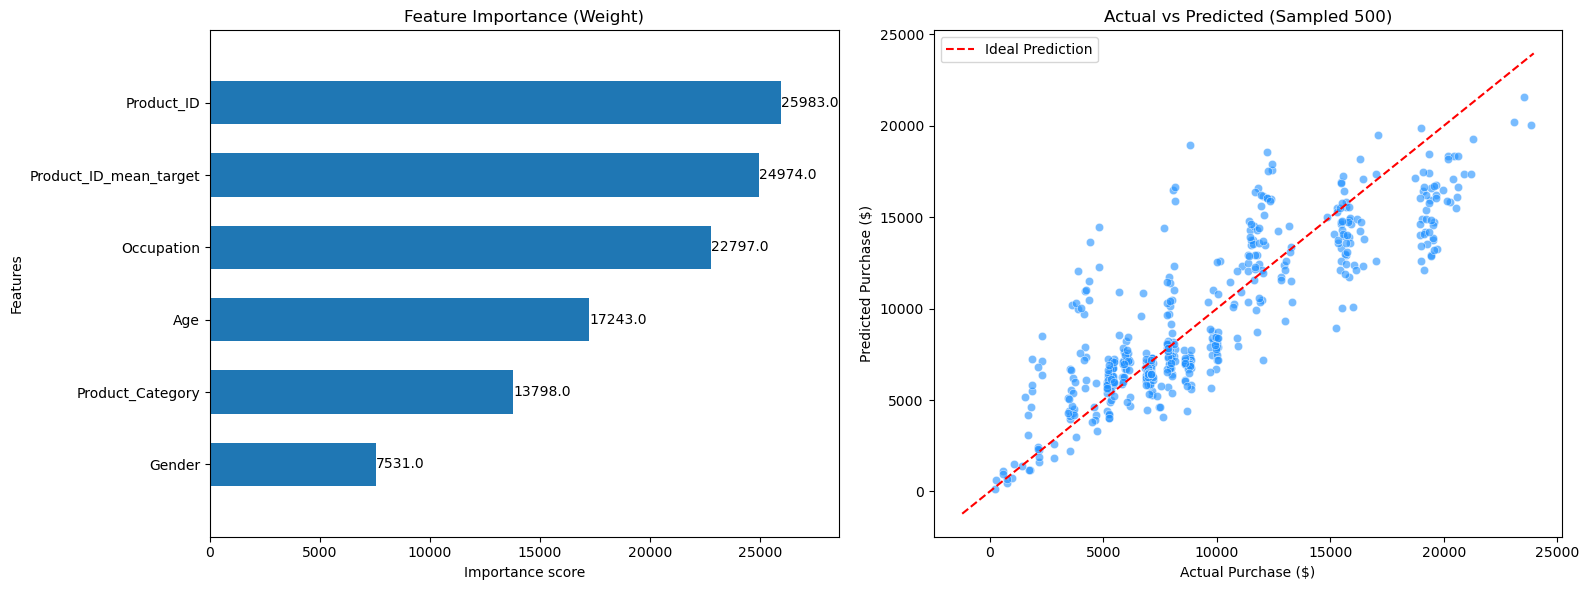

In [14]:
# --------------------------------------------------------------------------------
# 4. 시각화 (Visualization)
# --------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (필요시 주석 해제)
# plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False

# 캔버스 설정 (2개의 그래프를 나란히 그림)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# [그래프 1] Feature Importance (변수 중요도)
# XGBoost 내장 함수 사용
xgb.plot_importance(model, max_num_features=10, height=0.6, ax=ax[0], title='Feature Importance (Weight)')
ax[0].grid(False)

# [그래프 2] Actual vs Predicted (실제값 vs 예측값 산점도)
# 데이터가 너무 많으면 점이 겹쳐서 안 보이므로, 500개만 랜덤 샘플링해서 그립니다.
sample_indices = np.random.choice(len(y_test), 500, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred[sample_indices]

sns.scatterplot(x=y_test_sample, y=y_pred_sample, alpha=0.6, ax=ax[1], color='dodgerblue')

# 기준선 (Perfect Prediction Line) - 빨간 점선
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')

ax[1].set_title('Actual vs Predicted (Sampled 500)')
ax[1].set_xlabel('Actual Purchase ($)')
ax[1].set_ylabel('Predicted Purchase ($)')
ax[1].legend()

plt.tight_layout()
plt.show() # 그래프 출력

### 📉 모델 고도화 결과 요약

* **현황:** XGBoost 및 K-Fold 타겟 인코딩 적용 결과, **R² 0.71**로 기존 대비 성능 변화 미미함.
* **원인:** 상품 가격이 고정(정찰제)되어 있어 `Product_ID` 외 사용자 변수(나이, 성별)의 영향력이 매우 낮음.
* **결론:** 현 모델은 결측/신규 상품에 강한 **안정적 베이스라인**임. 예측력을 높이려면 모델 튜닝보다 **할인율, 구매 시점, 유저 이력** 등 **새로운 데이터 추가(Data-Centric)**가 필수적임.